In [175]:
import numpy as np 
import pandas as pd 
import string
import nltk
import csv
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
tech_jd = pd.read_csv("output_tech_qual.csv") 
tech_jd.head()

,job_title,soft_skills,technical_skills
0,.NET Developer,"['full', 'full', 'full', 'degree', 'full', 'hi...","['software', 'data', 'database', 'analysis', '..."
1,".NET Developer, Bureau of Environmental Diseas...","['full', 'full', 'specialized', 'full', 'highe...",['analysis']
2,.Net Programmer/Analyst for the Division of HP...,"['full', 'full', 'specialized', 'full', 'highe...",['analysis']
3,"ASSISTANT DEPUTY COMMISSIONER, INFRASTRUCTURE ...","['responsible', 'administrative', 'full', 'ful...","['database', 'data']"
4,"ASSISTANT DEPUTY COMMISSIONER, NETWORK,TELEPHO...","['responsible', 'administrative', 'full', 'ful...","['database', 'data']"


In [187]:
tech_jd['technical_skills']

0      ['software', 'data', 'database', 'analysis', '...
1                                           ['analysis']
2                                           ['analysis']
3                                   ['database', 'data']
4                                   ['database', 'data']
                             ...                        
194                                            ['cloud']
195                                 ['database', 'data']
196                                                   []
197                                             ['data']
198    ['software', 'data', 'database', 'analysis', '...
Name: technical_skills, Length: 199, dtype: object

In [188]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(tech_jd['technical_skills'])
data = coun_vect.vocabulary_
df_tech = pd.DataFrame(list(data.items()), columns=['Keyword', 'Frequency'])

In [189]:
df_tech['Keyword']

0       software
1           data
2       database
3       analysis
4    programming
5          cloud
Name: Keyword, dtype: object

In [190]:
skills = df_tech['Keyword']

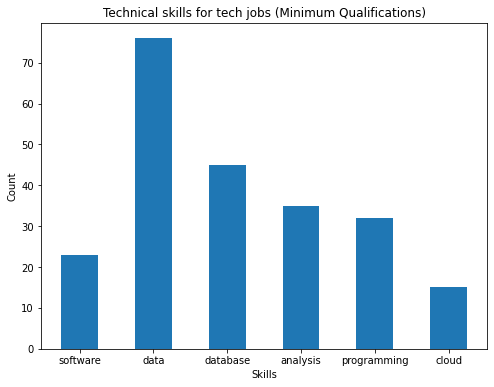

In [194]:
# count the occurrences of each keyword in the technical_skills column
counts = {skill: sum(tech_jd['technical_skills'].apply(lambda x: skill in x)) for skill in skills}


fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(counts)), list(counts.values()), align='center', width=0.5)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(list(counts.keys()))
ax.set_xlabel('Skills')
ax.set_ylabel('Count')
ax.set_title('Technical skills for tech jobs (Minimum Qualifications)')
plt.show()

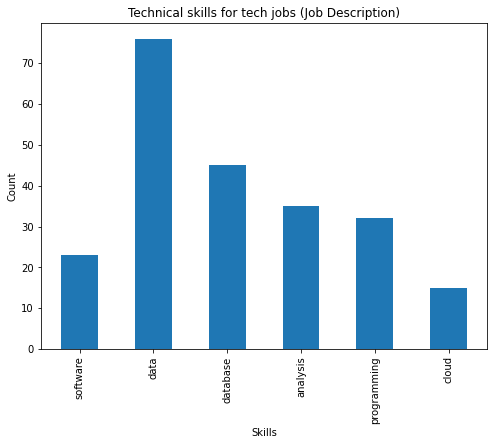

In [192]:
counts = {skill: sum(tech_jd['technical_skills'].apply(lambda x: skill in x)) for skill in skills}

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(counts)), list(counts.values()), align='center', width=0.5)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(list(counts.keys()),rotation = 90)
ax.set_xlabel('Skills')
ax.set_ylabel('Count')
ax.set_title('Technical skills for tech jobs (Job Description)')
plt.show()

In [200]:
sorted_dict = {k: counts[k] for k in sorted(counts)}
sorted_dict

{'analysis': 35,
 'cloud': 15,
 'data': 76,
 'database': 45,
 'programming': 32,
 'software': 23}

In [130]:
all_job_titles = set(tech_jd['job_title'])

In [131]:
all_technical_skills = set(df_tech['Keyword'])

In [132]:
# Initialize an empty dictionary to store the adjacency matrix values
adj_matrix = {}


# Loop through each row in the DataFrame
for index, row in tech_jd.iterrows():
    job_title = row['job_title']
    #skills = row['technical_skills'].split(', ')

    # For each technical skill in the row, update the adjacency matrix dictionary
    for skill in all_technical_skills:
        if skill.lower() not in row['technical_skills'].lower():
            continue
        key = (row['job_title'], skill)
        if key not in adj_matrix:
            adj_matrix[key] = 0
        adj_matrix[key] += 1

In [133]:
adj_matrix

{('2023-BLA-001-Undergraduate Legal Intern', 'excel'): 1,
 ('2023-BLA-002-Graduate Legal Intern', 'excel'): 1,
 ('ACCOUNT MANAGER', 'analysis'): 1,
 ('ACCOUNT MANAGER', 'excel'): 1,
 ('ACCOUNTABLE MANAGER', 'excel'): 1,
 ('ACCOUNTS PAYMENT ANALYST', 'excel'): 1,
 ('ADA - Senior Homicide Counsel', 'excel'): 1,
 ('ADMIN ASSISTANT - BRONX FJC', 'excel'): 1,
 ('ADMINISTRATIVE ACCOUNTANT', 'excel'): 1,
 ('ADMINISTRATIVE ACCOUNTANT, M-3', 'excel'): 1,
 ('ADMINISTRATIVE ASSISTANT', 'excel'): 1,
 ("ADMINISTRATIVE COORDINATOR FOR THE ACCO'S OFFICE", 'excel'): 1,
 ('ADMINISTRATIVE COORDINATOR â\x80\x93 FIRST DEPUTY COMMISSIONER AND G',
  'excel'): 1,
 ('ADMINISTRATIVE COORDINATOR, YOUNG MENâ\x80\x99S INITIATIVE', 'excel'): 1,
 ('ADMINISTRATIVE STAFF ANALYST', 'analysis'): 1,
 ('ADMINISTRATIVE STAFF ANALYST', 'excel'): 1,
 ('AGENCY ATTORNEY', 'excel'): 1,
 ('AGENCY ATTORNEY 03', 'excel'): 1,
 ('AGENCY ATTORNEY 1 â\x80\x93  EARLY INTERVENTION UNIT', 'excel'): 1,
 ('AGENCY ATTORNEY INTERN', 'excel'

In [134]:
with open('adj_matrix.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    # Write header row
    writer.writerow(['job_title', 'technical_skill'])
    # Write data rows
    for key, count in adj_matrix.items():
        writer.writerow([key[0], key[1]])

In [135]:
import networkx as nx 
G = nx.DiGraph() 

In [136]:
matrix = pd.read_csv("adj_matrix.csv") 

In [137]:
matrix.head()

,job_title,technical_skill
0,2023-BLA-001-Undergraduate Legal Intern,excel
1,2023-BLA-002-Graduate Legal Intern,excel
2,ACCOUNT MANAGER,analysis
3,ACCOUNT MANAGER,excel
4,ACCOUNTABLE MANAGER,excel


In [138]:
for index, row in matrix.iterrows(): 
      G.add_edge(row['job_title'],row['technical_skill']) 

In [139]:
color_map =[]
for node in G:
    if node in all_technical_skills:
        color_map.append('blue')
    else: 
        color_map.append('green') 

In [140]:
d = dict(G.degree)

In [141]:
labels = {}    
for node in G.nodes():
    if node in all_technical_skills:
        labels[node] = node
    else:
        labels[node] = ""

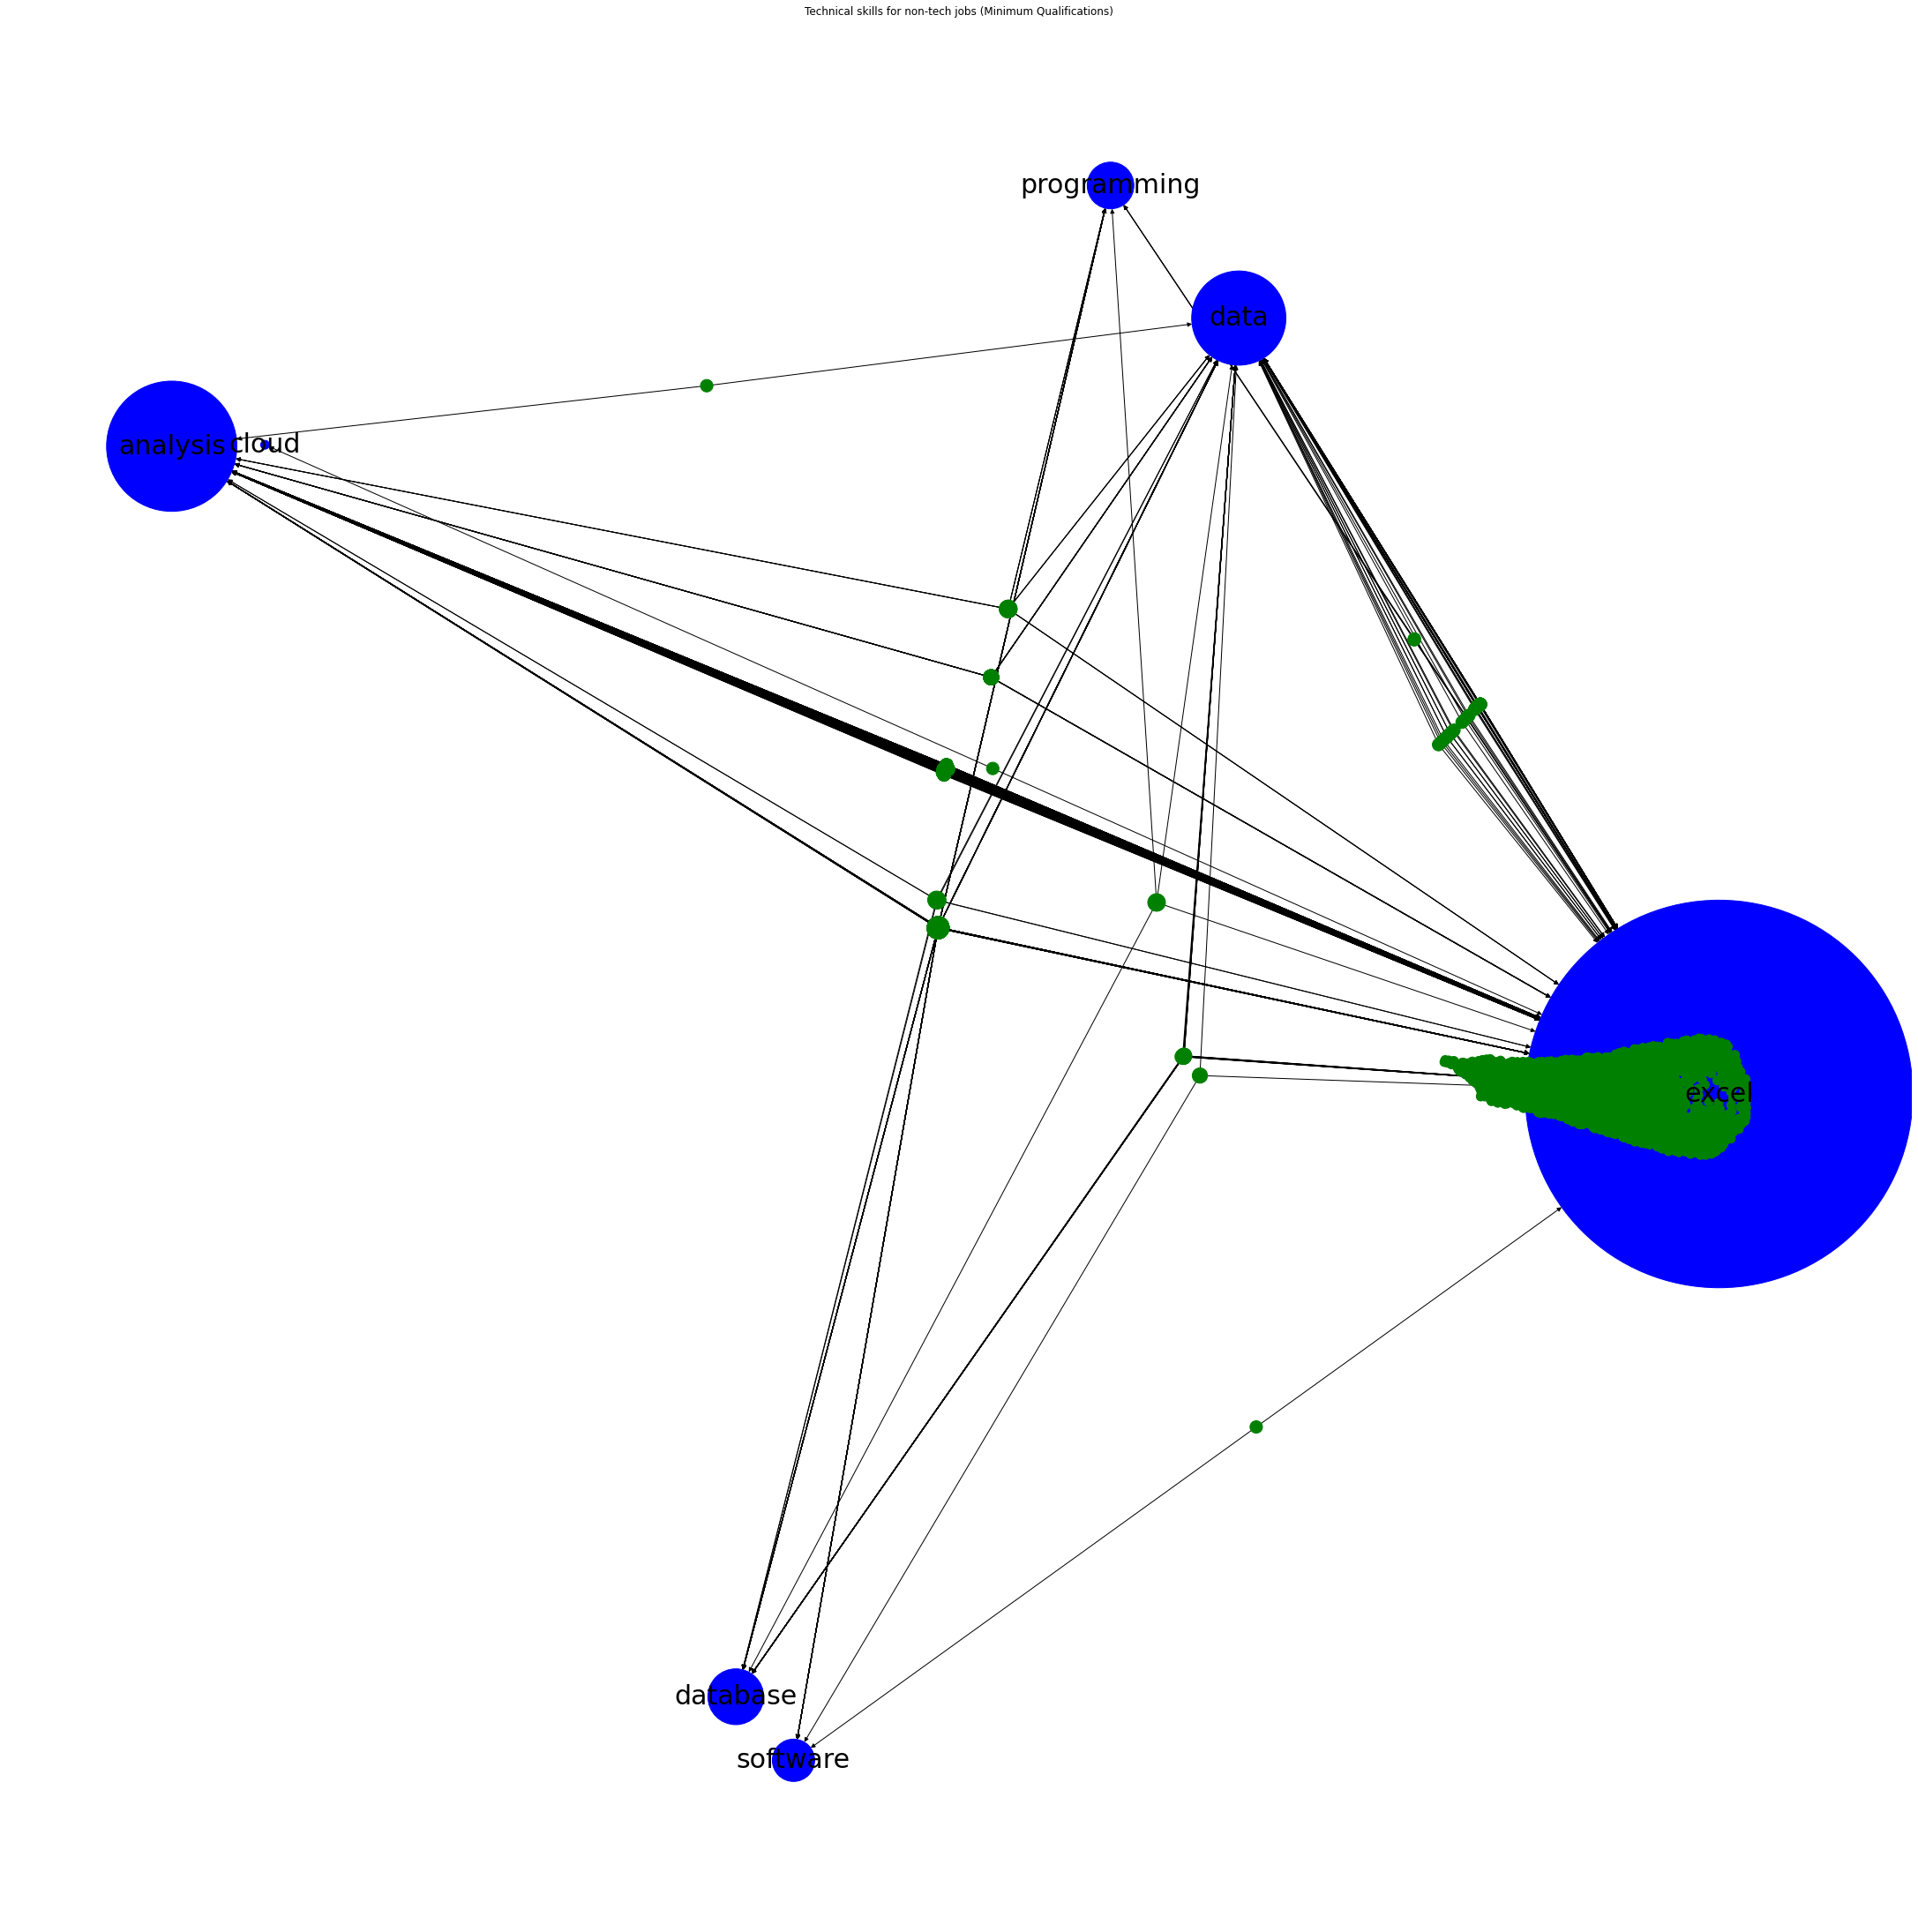

In [145]:
import matplotlib.pyplot as plt 
plt.figure(3,figsize=(30,30)) 
nx.draw(G, node_color=color_map,  node_size=[v * 100 for v in d.values()], with_labels=True, labels = labels,
        font_size=30,font_weight='normal')
plt.title('Technical skills for non-tech jobs (Minimum Qualifications)')
plt.show()

In [75]:
pip install decorator==5.0.9

Note: you may need to restart the kernel to use updated packages.
